This project will study the VGG-16 architecture (also known as VGG-Net).

We will start by implementing it in Keras (but one can use VGG-16 directly from Keras using tf.keras.applications.VGG16).

Then we will classify some picture using the Transfer Learning tehcnique on a pretrained VGG-16 version (available in Keras as tf.keras.applications.VGG16). 

# VGG-16 Architecture

- 13 convolution layers (F=3, S=1, P=1, K=64/128/256/512) with ReLU activation
- 2 fully connected layers (1x1x4096) with ReLU activation
- 5 pooling layers (F=2, S=2)
- 1 fully connected output layer (1000 classes) with Softmax activation

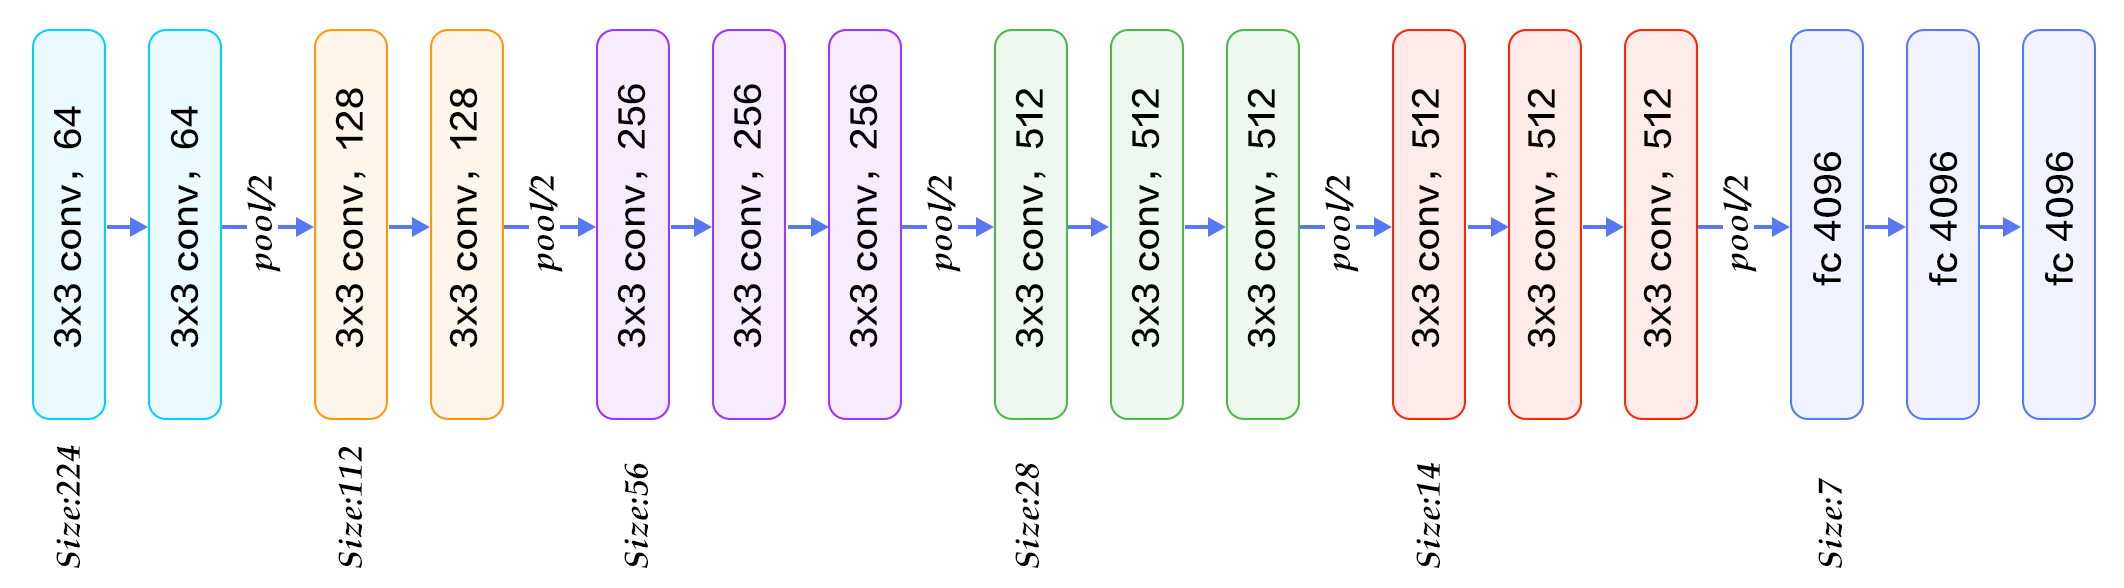
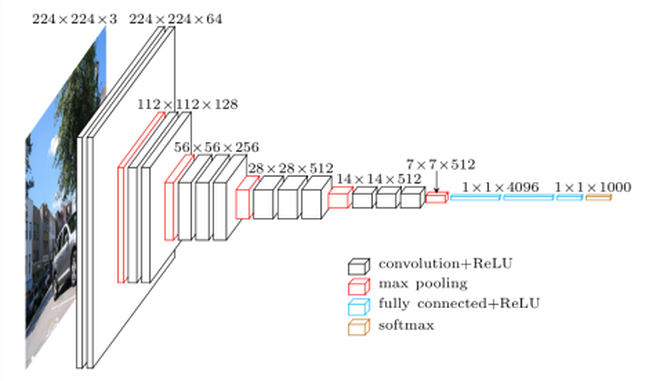

# Transfer-Learning using VGG-16 trained on ImageNet

In [1]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras import Model

In [2]:
model = VGG16(include_top=False, input_shape=(224, 224, 3)) # default weights = 'imagenet'

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Get output stream from the last layer (black5_pool)

In [4]:
x = model.output

#### Add the 3 last fully connected layer (because we will change it whatever is the selected strategy)

In [5]:
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

#### Define the new model

In [6]:
model_with_transfer = Model(inputs=model.input, outputs=output_layer)

In [7]:
model_with_transfer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Select the appropriate strategy

#### Strategy #1 -- Complete fine-tuning
If the **new dataset is large** enough

In [8]:
# All layers can continue the training
    
for layer in model_with_transfer.layers:
    layer.trainable = True

#### Strategy #2 -- Feature extraction
If the **new dataset is small** and the **new picture are similar** to the ones used in pre-training

In [ ]:
# None of the layers can continue the training, but the output layer
# `trainable=True` is supposed to be the default for all layers
# (if you applied another strategy, reset them)

for layer in model_with_transfer.layers[:-1]:
    layer.trainable = False

#### Strategy #3 -- Partial fine-tuning
If the **new dataset is small** and the **new pictures are different** from the ones used in pre-training.

In [ ]:
# The top 5 layers can't be trained anymore
# `trainable=True` is supposed to be the default for all layers 
# (if you applied another strategy, reset them)

for layer in model_with_transfer.layers[:5]:
    layer.trainable = False

#### Check the layers' `trainable` status

In [9]:
model_with_transfer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
for layer in model_with_transfer.layers:
    print(f"{layer.name:10} \t--> trainable: {layer.trainable}")

input_1    	--> trainable: True
block1_conv1 	--> trainable: True
block1_conv2 	--> trainable: True
block1_pool 	--> trainable: True
block2_conv1 	--> trainable: True
block2_conv2 	--> trainable: True
block2_pool 	--> trainable: True
block3_conv1 	--> trainable: True
block3_conv2 	--> trainable: True
block3_conv3 	--> trainable: True
block3_pool 	--> trainable: True
block4_conv1 	--> trainable: True
block4_conv2 	--> trainable: True
block4_conv3 	--> trainable: True
block4_pool 	--> trainable: True
block5_conv1 	--> trainable: True
block5_conv2 	--> trainable: True
block5_conv3 	--> trainable: True
block5_pool 	--> trainable: True
flatten    	--> trainable: True
dense      	--> trainable: True
dense_1    	--> trainable: True
dense_2    	--> trainable: True


# Train the new model

#### Compile the new model

In [11]:
from tensorflow import keras

In [12]:
model_with_transfer.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

#### Fit the new model

In [13]:
model_with_transfer_infos = model_with_transfer.fit(
    X_train, y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    verbose=2)

NameError: name 'X_train' is not defined

/!\ Expected error because no training data is provided for this notebook

# Predict

### Prepare images for CNN / VGG-16

In [37]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

#### Load a picture

In [38]:
img = load_img('data/lion.jpeg', target_size=(224, 224))

#### Convert to numpy array

In [39]:
img = img_to_array(img)

#### Convert to collection (with only 1 sample in this case)

In [40]:
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

#### Apply VGG-16 input preprocessing

In [41]:
img = preprocess_input(img)

### Predict & decode output

In [19]:
y = model_with_transfer.predict(img)

In [20]:
y.shape

(1, 10)

In [21]:
y

array([[1.1008158e-11, 1.0750111e-20, 5.1237103e-02, 4.0325340e-06,
        4.9123333e-10, 7.0440108e-01, 1.3622404e-06, 2.8200458e-09,
        1.4862679e-11, 2.4435651e-01]], dtype=float32)

#### Get result

In [32]:
# decode_predictions(y, top=5) # doesn't work here because we don't use the default classes anymore...

In [23]:
import numpy as np

In [36]:
# create a list containing the class labels
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10' ]

# find the index of the class with maximum score
pred = np.argmax(y[0], axis=-1)

# print the label of the class with maximum score
print(f"{class_labels[pred]} with {y[0][pred]:.3f}%")


class6 with 0.704%
